# Nonlinear SVC

### Problem Formulation

The primal form for nonlinear SVC can be expressed as:

$$
\begin{align}
&\min_{\mathbf{w}, b, \mathbf{\xi}}  && \frac{1}{2}\mathbf{w}^{T}\mathbf{w} + C \sum_{i=1}^{m}\xi_{i}\\
&\text{subj. to}  && y_{i}\big(\mathbf{w}^{T}\phi(\mathbf{x}_{i}) + b\big) \ge 1 - \xi_{i}, \quad \xi_{i} \ge 0
\end{align}
$$

The Lagrangian function for this problem is:

$$
\mathcal{L}(\mathbf{w},b,\mathbf{\xi},\mathbf{\alpha}) = \frac{1}{2}\mathbf{w}^{T}\mathbf{w} + C \sum_{i=1}^{m}\xi_{i} + \sum_{i}^{m}\alpha_{i}\Big(1 - \xi_{i} - y_{i}\big(\mathbf{w}^{T}\phi(\mathbf{x}_{i}) + b\big) \Big)
$$

Stationarity KKT conditions:

$$
\begin{align}
&\nabla_{\mathbf{w}}\mathcal{L} = \mathbf{w} - \sum_{i=1}^{m}\alpha_{i}y_{i}\phi(\mathbf{x}_{i}) = 0\\
&\frac{\partial \mathcal{L}}{\partial b} = -\sum_{i=1}^{m}\alpha_{i}y_{i} = 0
\end{align}
$$

Substituting the stationarity conditions back into the Lagrangian eliminates $\mathbf{w}$ and $b$:

$$
\mathcal{L}(\mathbf{\alpha},\mathbf{\xi}) = \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_{i}\alpha_{j}y_{i}y_{j}\phi(\mathbf{x}_{i})^{T}\phi(\mathbf{x}_{j}) + \sum_{i=1}^{m}\alpha_{i} + \sum_{i=1}^{m}\xi_{i}(C - \alpha_{i})
$$

With the Lagrangian, the dual of the primal problem can be expressed as:

$$
\begin{align}
&\max_{\mathbf{\alpha}, \mathbf{\xi}} && -\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_{i}\alpha_{j}y_{i}y_{j}\phi(\mathbf{x}_{i})^{T}\phi(\mathbf{x}_{j}) + \sum_{i=1}^{m}\alpha_{i} + \sum_{i=1}^{m}\xi_{i}(C - \alpha_{i})\\
&\text{subj. to} && \mathbf{y}^{T}\mathbf{\alpha}=0, \quad \xi_{i} \ge 0, \quad \mathbf{\alpha} \ge 0
\end{align}
$$

Converting the problem to a minimization:

$$
\begin{align}
&\min_{\mathbf{\alpha}, \mathbf{\xi}} && \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_{i}\alpha_{j}y_{i}y_{j}\phi(\mathbf{x}_{i})^{T}\phi(\mathbf{x}_{j}) - \sum_{i=1}^{m}\alpha_{i} - \sum_{i=1}^{m}\xi_{i}(C - \alpha_{i})\\
&\text{subj. to} && \mathbf{y}^{T}\mathbf{\alpha}=0, \quad \xi_{i} \ge 0, \quad \mathbf{\alpha} \ge 0
\end{align}
$$

Considering $\mathbf{\xi}$ as a Lagrange multiplier, this problem can be re-cast as:

$$
\begin{align}
&\min_{\mathbf{\alpha}, \mathbf{\xi}} && \frac{1}{2}\mathbf{\alpha}^{T}\mathbf{G}\mathbf{\alpha} - \mathbf{e}^{T}\mathbf{\alpha}\\
&\text{subj. to} && \mathbf{y}^{T}\mathbf{\alpha}=0, \quad 0 \le \alpha_{i} \le C
\end{align}
$$

where $\mathbf{G}_{ij} = y_{i}y_{j}\phi(\mathbf{x}_{i})^{T}\phi(\mathbf{x}_{j})$ is positive semidefinite.  This problem is a convex QP.  Note that the strength of the penalty, $C$, in the primal problem limits how large the dual variables, $\alpha_{i}$, can become.

The elements of $\mathbf{\alpha}$ which are greater than 0 can be used to determine the decision function to classify new instances of $x$.  First it is necessary to determine the bias term, $\hat{b}$, which can be obtained from the instances of $\mathbf{\alpha}$ where $0 < \alpha_{i} < C$.  These instances are dual variables of support vectors that lie on the margins, where $\xi_{i} = 0$.  Thus, $\hat{b}$ can be obtained from the active constraint $y_{i}\big(\hat{\mathbf{w}}^{T}\phi(\mathbf{x}_{i}) + \hat{b}\big)=1$.  Multiplying both sides by $y_{i}$ we have $\hat{\mathbf{w}}^{T}\phi(\mathbf{x}_{i}) + \hat{b}=y_{i}$.  We can now compute $\hat{b}$ by averaging over all the support vectors on the margin:

$$
\begin{gather}
\hat{b} = \frac{1}{n_{s}}\sum_{i=1}^{n_s}\Big(y_{i} - \hat{\mathbf{w}}^{T}\phi(\mathbf{x}_{i})\Big)\\
\hat{b} = \frac{1}{n_{s}}\sum_{i=1}^{n_s}\Big(y_{i} - \sum_{j=1}^{m}\alpha_{j}y_{j}\phi(\mathbf{x}_{i})^{T}\phi(\mathbf{x}_{j})\Big)
\end{gather}
$$

New instances, $\mathbf{x}^{\prime}$ can be classifed using the decision function $h(\mathbf{x}^{\prime})$:

$$
\begin{gather}
h(\mathbf{x}^{\prime}) = \hat{b} + \sum_{i=1}^{m}\alpha_{i}y_{i}\phi(\mathbf{x}^{\prime})^{T}\phi(\mathbf{x}_{i}),
\end{gather}
$$

where the summation occurs over all non-zero support vectors.

In [1]:
import numpy as np
import numpy.linalg as LA
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Generate Data
X,y = datasets.make_moons(noise=0.2)

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Scale the data
scalerX = StandardScaler().fit(X)
X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)
X_scaled = scalerX.transform(X)

In [6]:
#SVM sklearn

#kernel
kernel_name = 'rbf'

C = 5
clf = SVC(kernel=kernel_name, degree=3, coef0=1, C=C)
clf.fit(X_train_scaled, y_train)

dual_coefs = clf.dual_coef_.flatten()
print("dual coefficients:")
print(dual_coefs)
print("\n-----------------\n")

support_vecs = clf.support_vectors_

intercept = clf.intercept_
print("Intercept:")
print(intercept)
print("\n-----------------\n")

dual coefficients:
[-1.8343627  -1.19186676 -5.         -5.         -5.         -5.
 -3.90822822 -0.75088879 -5.         -5.         -5.          5.
  1.6254994   2.96449742  5.          4.34676869  5.          5.
  5.          0.54678363  5.          3.20179734]

-----------------

Intercept:
[-0.08985642]

-----------------



In [7]:
#Function Definitions

def setup_kernel(params):
    #polynomial kernel
    if params['kernel']=='poly':
        
        def _nonlin_kernel(x1,x2):
            _gamma = params['gamma']
            _degree = params['degree']
            _r = params['r']
            return (_gamma * np.dot(x1,x2) + _r)**_degree
        
        return _nonlin_kernel
    
    #gaussian RBF
    elif params['kernel']=='rbf':
        
        def _nonlin_kernel(x1,x2):
            _gamma = params['gamma']
            return np.exp(-_gamma * LA.norm(x1 - x2,2)**2)
        
        return _nonlin_kernel
        
def Gram_matrix(x,y,kernel):    
    num_points,_ = x.shape
    G = np.zeros((num_points,num_points))
    for ii in range(0,num_points):
        for jj in range(ii,num_points):
            _g = y[ii]*y[jj]*kernel(x[ii],x[jj])
            G[ii,jj] = _g
            G[jj,ii] = _g
    return G


def compute_bhat(alpha,x,y,kernel,C):
    epsilon = 1e-10
    #find values of alpha on the margin (less than C and greater than 0)
    _alpha = alpha[alpha < (C - epsilon)]
    _x = x[alpha < (C - epsilon)]
    _y = y[alpha < (C - epsilon)]
    
    #sum over all support vectors on the margin
    ns = len(_alpha)
    bhat = 0
    for ii in range(0,ns):
        _bhat = 0
        #for vectors on the margin: y_i - theta^T * X_i
        for jj in range(0,len(alpha)):
            #theta^T * X_i
            _bhat += alpha[jj] * y[jj] * kernel(_x[ii],x[jj])
        bhat += _y[ii] - _bhat
    bhat = bhat/ns
    return bhat

def predict(x_new,x,y,alpha,bhat,kernel):
    y_pred = bhat
    for ii in range(len(alpha)):
        y_pred += alpha[ii] * y[ii] * kernel(x_new,x[ii])
    
    if y_pred > 0:
        return 1 
    else:
        return 0

In [8]:
#Solve from Scratch

#setup kernel and Gram matrix
gamma = 1/(X_train_scaled.shape[1] * X_train_scaled.var())
params = {'kernel':kernel_name,'gamma':gamma,'degree':3,'r':1}

kernel_func = setup_kernel(params)

y_ones = np.copy(y_train)
y_ones[y_train==0]=-1
G = Gram_matrix(X_train_scaled,y_ones,kernel_func)

#solve dual problem with CVX

n = len(X_train_scaled)

e = -np.ones(n)
lb = np.zeros(n)
ub = C*np.ones(n)

theta = cp.Variable(n)
prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(theta, G) + e.T @ theta),
                 [theta >= lb,
                  theta <= ub,
                  y_ones.T @ theta == 0])
prob.solve()
alpha_scratch = theta.value

#zero-out entries close to 0
epsilon = 1e-10
alpha_scratch[np.abs(alpha_scratch) < epsilon]=0

#get support vectors
X_support = X_train_scaled[alpha_scratch > 0,:]
y_support = y_ones[alpha_scratch > 0]

#remove alphas for inactive constraints (should be equal to 0)
alpha_support = alpha_scratch[alpha_scratch > 0]

print("scratch dual coefficients:")
print(alpha_support)
print("\n-----------------\n")

#compute intercept
bhat = compute_bhat(alpha_support,X_support,y_support,kernel_func,C)
print("scratch intercept:")
print(bhat)
print("\n-----------------\n")

#test = predict(np.array([2,2]),X_support,y_support,alpha_support,bhat,kernel_func)

scratch dual coefficients:
[5.         1.83564897 1.61377417 1.19156502 2.96311071 5.
 5.         5.         4.34602534 5.         5.         3.90781908
 0.74822945 5.         5.         5.         5.         5.
 0.55080362 5.         3.20954868 5.        ]

-----------------

scratch intercept:
-0.089530709913457

-----------------



Text(0.5, 1.0, 'sklearn kernel SVM')

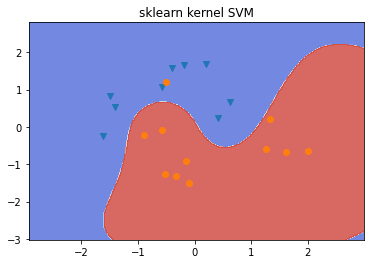

In [12]:
#sklearn - plot results

# create meshgrid for plotting
h = 0.02 #step size of mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#predict classes using sklearn kernel SVM classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# contour plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

#testing data
X0 = X_test_scaled[y_test==0]
X1 = X_test_scaled[y_test==1]

# Plot the test data
plt.scatter(X0[:, 0], X0[:, 1], marker='v')
plt.scatter(X1[:, 0], X1[:, 1], marker='o')
plt.title('sklearn kernel SVM')

In [10]:
#predict classes from scratch
Z_scratch = np.zeros(shape=xx.shape)
x_dim,y_dim = Z_scratch.shape

for ii in range(0,x_dim):
    for jj in range(0,y_dim):
        x_new = np.array([xx[ii,jj],yy[ii,jj]])
        Z_scratch[ii,jj] = predict(x_new,X_support,y_support,alpha_support,bhat,kernel_func)

Text(0.5, 1.0, 'scratch kernel SVM')

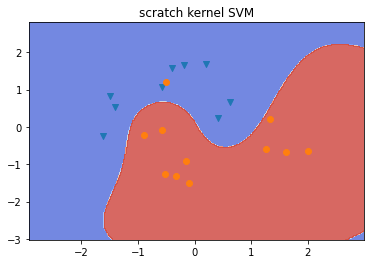

In [13]:
#scratch - plot results
plt.contourf(xx, yy, Z_scratch, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0[:, 0], X0[:, 1], marker='v')
plt.scatter(X1[:, 0], X1[:, 1], marker='o')
plt.title('scratch kernel SVM')